In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#open and read CSV
path1 = os.path.join("Vaccination_Resources", "vaccination_2014-15.csv")
path2 = os.path.join("Vaccination_Resources", "vaccination_2015-16.csv")
path3 = os.path.join("Vaccination_Resources", "vaccination_2016-17.csv")
path4 = os.path.join("Vaccination_Resources", "vaccination_2017-18.csv")
path5 = os.path.join("Vaccination_Resources", "vaccination_2018-19.csv")

df_1 = pd.read_csv(path1)
df_2 = pd.read_csv(path2)
df_3 = pd.read_csv(path3)
df_4 = pd.read_csv(path4)
df_5 = pd.read_csv(path5)

df_1.head(6)

,Names,< 6 months,6 months - 4 years,5-12 years,13-17 years,18-49 years,50-64 years,> 65 years,White,Black,Hispanic,Other Races
0,Alabama,45.8,63.6,61.2,46.2,31.3,47.6,65.3,47.2,41.5,55.9,42.9
1,Alaska,44.0,65.2,59.3,33.6,37.5,40.2,57.5,43.5,54.2,40.2,44.7
2,Arizona,41.6,66.2,52.9,40.6,27.5,41.9,62.4,42.7,30.5,40.4,43.4
3,Arkansas,50.5,67.1,71.9,57.3,37.0,43.4,69.6,50.5,43.0,68.4,54.3
4,California,44.2,72.0,63.4,44.1,29.7,44.9,64.7,46.6,39.8,40.7,48.7
5,Colorado,49.0,72.4,59.3,48.4,37.3,47.0,73.0,49.7,47.2,47.7,48.9


In [3]:
#CA only vs target 
#selecting data only in regards to the different age ranges in CA
ca1415_df = df_1.iloc[[4],0:8]
ca1516_df = df_2.iloc[[4],0:8]
ca1617_df = df_3.iloc[[4],0:8]
ca1718_df = df_4.iloc[[4],0:8]
ca1819_df = df_5.iloc[[4],0:8]
HP2020target_df = df_1.iloc[[62],0:8]

ca1415_df

,Names,< 6 months,6 months - 4 years,5-12 years,13-17 years,18-49 years,50-64 years,> 65 years
4,California,44.2,72.0,63.4,44.1,29.7,44.9,64.7


In [4]:
#Set Names as index
ca1415_df = ca1415_df.set_index("Names")
ca1516_df = ca1516_df.set_index("Names")
ca1617_df = ca1617_df.set_index("Names")
ca1718_df = ca1718_df.set_index("Names")
ca1819_df = ca1819_df.set_index("Names")
HP2020target_df = HP2020target_df.set_index("Names")

In [5]:
#reanme indexes based on year
ca1415_df= ca1415_df.rename({'California': 'California 2014-15'}, axis='index')
ca1516_df= ca1516_df.rename({'California': 'California 2015-16'}, axis='index')
ca1617_df= ca1617_df.rename({'California': 'California 2016-17'}, axis='index')
ca1718_df= ca1718_df.rename({'California': 'California 2017-18'}, axis='index')
ca1819_df= ca1819_df.rename({'California': 'California 2018-19'}, axis='index')

ca1415_df

,< 6 months,6 months - 4 years,5-12 years,13-17 years,18-49 years,50-64 years,> 65 years
Names,,,,,,,
California 2014-15,44.2,72.0,63.4,44.1,29.7,44.9,64.7


In [6]:
#concat all of the dataframes based on CA
dfs = [ca1415_df,ca1516_df,ca1617_df,ca1718_df,ca1819_df, HP2020target_df]

df_final_age = pd.concat(dfs)
df_final_age


,< 6 months,6 months - 4 years,5-12 years,13-17 years,18-49 years,50-64 years,> 65 years
Names,,,,,,,
California 2014-15,44.2,72.0,63.4,44.1,29.7,44.9,64.7
California 2015-16,43.7,70.0,63.5,47.4,32.5,38.3,61.1
California 2016-17,48,73.3,61.5,53.9,36.4,45.7,66.2
California 2017-18,40.0,67.8,58.3,48.7,25.3,39.3,58.1
California 2018-19,47.4,77.1,66.6,49.9,33.7,43.8,69.0
HP 2020 Target,70,70.0,70.0,70.0,70,70,70


In [7]:
df_final_age.rename_axis("Ages", axis="columns")

Ages,< 6 months,6 months - 4 years,5-12 years,13-17 years,18-49 years,50-64 years,> 65 years
Names,,,,,,,
California 2014-15,44.2,72.0,63.4,44.1,29.7,44.9,64.7
California 2015-16,43.7,70.0,63.5,47.4,32.5,38.3,61.1
California 2016-17,48,73.3,61.5,53.9,36.4,45.7,66.2
California 2017-18,40.0,67.8,58.3,48.7,25.3,39.3,58.1
California 2018-19,47.4,77.1,66.6,49.9,33.7,43.8,69.0
HP 2020 Target,70,70.0,70.0,70.0,70,70,70


In [8]:
#switch colmns and row to properly plot the graph
df_final_age_t = df_final_age.transpose()
df_final_age_t

Names,California 2014-15,California 2015-16,California 2016-17,California 2017-18,California 2018-19,HP 2020 Target
< 6 months,44.2,43.7,48,40.0,47.4,70
6 months - 4 years,72,70,73.3,67.8,77.1,70
5-12 years,63.4,63.5,61.5,58.3,66.6,70
13-17 years,44.1,47.4,53.9,48.7,49.9,70
18-49 years,29.7,32.5,36.4,25.3,33.7,70
50-64 years,44.9,38.3,45.7,39.3,43.8,70
> 65 years,64.7,61.1,66.2,58.1,69.0,70


In [9]:
#covert all columns to numberic values
df_final_age_t = df_final_age_t.loc[:,:].astype(float)

In [10]:
years_df = df_final_age_t.loc[:,["California 2014-15","California 2015-16", "California 2016-17", "California 2017-18", "California 2018-19", "HP 2020 Target" ]]
years_df

Names,California 2014-15,California 2015-16,California 2016-17,California 2017-18,California 2018-19,HP 2020 Target
< 6 months,44.2,43.7,48.0,40.0,47.4,70.0
6 months - 4 years,72.0,70.0,73.3,67.8,77.1,70.0
5-12 years,63.4,63.5,61.5,58.3,66.6,70.0
13-17 years,44.1,47.4,53.9,48.7,49.9,70.0
18-49 years,29.7,32.5,36.4,25.3,33.7,70.0
50-64 years,44.9,38.3,45.7,39.3,43.8,70.0
> 65 years,64.7,61.1,66.2,58.1,69.0,70.0


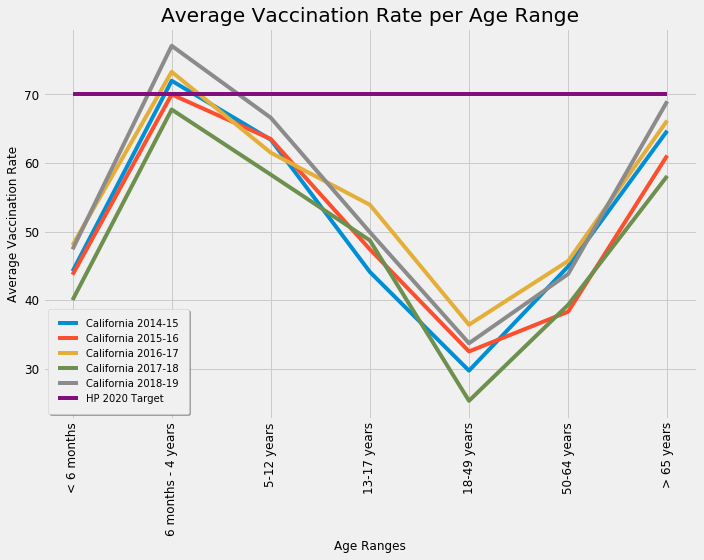

In [12]:
# plot data 

fig,ax =plt.subplots()
plt.style.use('fivethirtyeight')
years_df.plot(kind='line', title ="Average Vaccination Rate per Age Range", figsize=(10, 8), legend=True, fontsize=12, ax=ax)
ax.set_xlabel("Age Ranges", fontsize=12)
labels = ['< 6 months','6 months - 4 years','5-12 years', '13-17 years', '18-49 years', '50-64 years','> 65 years']
ax.set_xticklabels(labels,rotation="vertical")
ax.set_ylabel("Average Vaccination Rate", fontsize=12)
plt.axis('tight')
ax.legend(loc=3, fancybox=True, borderpad=1, prop={'size':10}, shadow=True)
plt.tight_layout()
plt.show()


In [69]:
#Save the plot image 
path_age = os.path.join(os.path.expanduser("~"), "Desktop", "avg_vacc_rate_age.png")
path_age
fig.savefig(path_age)

In [14]:
years_df_bar = df_final_age_t.loc[:,["California 2014-15","California 2015-16", "California 2016-17", "California 2017-18", "California 2018-19" ]]
years_df_bar

Names,California 2014-15,California 2015-16,California 2016-17,California 2017-18,California 2018-19
< 6 months,44.2,43.7,48.0,40.0,47.4
6 months - 4 years,72.0,70.0,73.3,67.8,77.1
5-12 years,63.4,63.5,61.5,58.3,66.6
13-17 years,44.1,47.4,53.9,48.7,49.9
18-49 years,29.7,32.5,36.4,25.3,33.7
50-64 years,44.9,38.3,45.7,39.3,43.8
> 65 years,64.7,61.1,66.2,58.1,69.0


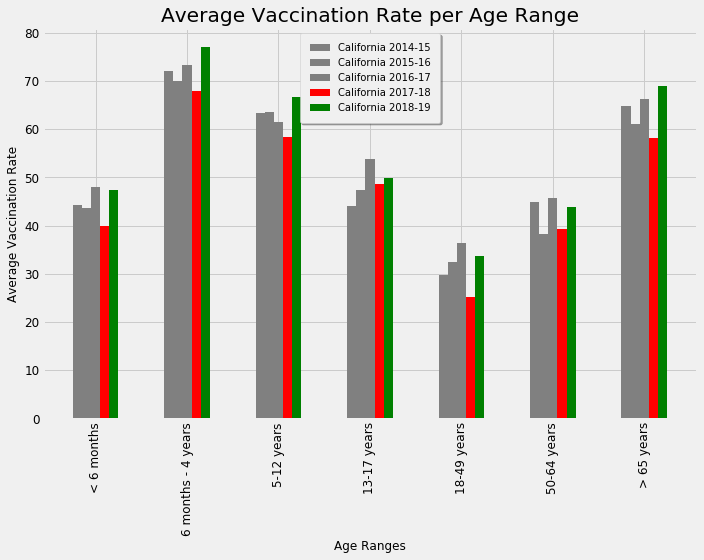

In [15]:
fig3,ax3 =plt.subplots()

#plot style
plt.style.use('fivethirtyeight')

#colors of bars
my_colors = ['gray','gray', 'gray', 'red', 'green']

#plot bar graphs
years_df_bar.plot(kind='bar', title ="Average Vaccination Rate per Age Range", figsize=(10, 8), legend=True, fontsize=12, color = my_colors, ax=ax3)

#labels
labels = ['< 6 months','6 months - 4 years','5-12 years', '13-17 years', '18-49 years', '50-64 years','> 65 years']

ax3.set_xlabel("Age Ranges", fontsize=12)
ax3.set_xticklabels(labels,rotation="vertical")
ax3.set_ylabel("Average Vaccination Rate", fontsize=12)
plt.axis('tight')
ax3.legend(loc="best", fancybox=True, borderpad=1, prop={'size':10}, shadow=True)


plt.tight_layout()
plt.show()

In [26]:
#Save the plot image 
path_age_bar = os.path.join(os.path.expanduser("~"), "Desktop", "avg_vacc_rate_age_bar.png")
path_age_bar
fig3.savefig(path_age_bar)

In [16]:
#CA only vs target for Ethnicity
ca1415eth_df = df_1.iloc[[4],[0,8,9,10,11]]
ca1516eth_df = df_2.iloc[[4],[0,8,9,10,11]]
ca1617eth_df = df_3.iloc[[4],[0,8,9,10,11]]
ca1718eth_df = df_4.iloc[[4],[0,8,9,10,11]]
ca1819eth_df = df_5.iloc[[4],[0,8,9,10,11]]
HP2020targeteth_df = df_1.iloc[[62],[0,8,9,10,11]]

ca1415eth_df

,Names,White,Black,Hispanic,Other Races
4,California,46.6,39.8,40.7,48.7


In [17]:
ca1415eth_df = ca1415eth_df.set_index("Names")
ca1516eth_df = ca1516eth_df.set_index("Names")
ca1617eth_df = ca1617eth_df.set_index("Names")
ca1718eth_df = ca1718eth_df.set_index("Names")
ca1819eth_df = ca1819eth_df.set_index("Names")
HP2020targeteth_df = HP2020targeteth_df.set_index("Names")

In [18]:
#reanme indexes based on year
ca1415eth_df= ca1415eth_df.rename({'California': 'California 2014-15'}, axis='index')
ca1516eth_df= ca1516eth_df.rename({'California': 'California 2015-16'}, axis='index')
ca1617eth_df= ca1617eth_df.rename({'California': 'California 2016-17'}, axis='index')
ca1718eth_df= ca1718eth_df.rename({'California': 'California 2017-18'}, axis='index')
ca1819eth_df= ca1819eth_df.rename({'California': 'California 2018-19'}, axis='index')

ca1415eth_df

,White,Black,Hispanic,Other Races
Names,,,,
California 2014-15,46.6,39.8,40.7,48.7


In [19]:
dfs_eth = [ca1415eth_df, ca1516eth_df, ca1617eth_df, ca1718eth_df, ca1819eth_df, HP2020targeteth_df]

df_final_eth = pd.concat(dfs_eth)
df_final_eth

,White,Black,Hispanic,Other Races
Names,,,,
California 2014-15,46.6,39.8,40.7,48.7
California 2015-16,47.8,40.7,41.1,43
California 2016-17,50.4,37.0,46.6,51.7
California 2017-18,44.4,35.0,35.2,43.2
California 2018-19,52.3,40.8,44.6,45.0
HP 2020 Target,70,70.0,70,70


In [20]:
df_final_eth_t = df_final_eth.transpose()
df_final_eth_t

Names,California 2014-15,California 2015-16,California 2016-17,California 2017-18,California 2018-19,HP 2020 Target
White,46.6,47.8,50.4,44.4,52.3,70
Black,39.8,40.7,37.0,35.0,40.8,70.0
Hispanic,40.7,41.1,46.6,35.2,44.6,70
Other Races,48.7,43,51.7,43.2,45.0,70


In [21]:
#covert all columns to numberic values
df_final_eth_t = df_final_eth_t.loc[:,:].astype(float)

In [22]:
years_df_eth = df_final_eth_t.loc[:,["California 2014-15","California 2015-16", "California 2016-17", "California 2017-18", "California 2018-19", "HP 2020 Target" ]]
years_df_eth

Names,California 2014-15,California 2015-16,California 2016-17,California 2017-18,California 2018-19,HP 2020 Target
White,46.6,47.8,50.4,44.4,52.3,70.0
Black,39.8,40.7,37.0,35.0,40.8,70.0
Hispanic,40.7,41.1,46.6,35.2,44.6,70.0
Other Races,48.7,43.0,51.7,43.2,45.0,70.0


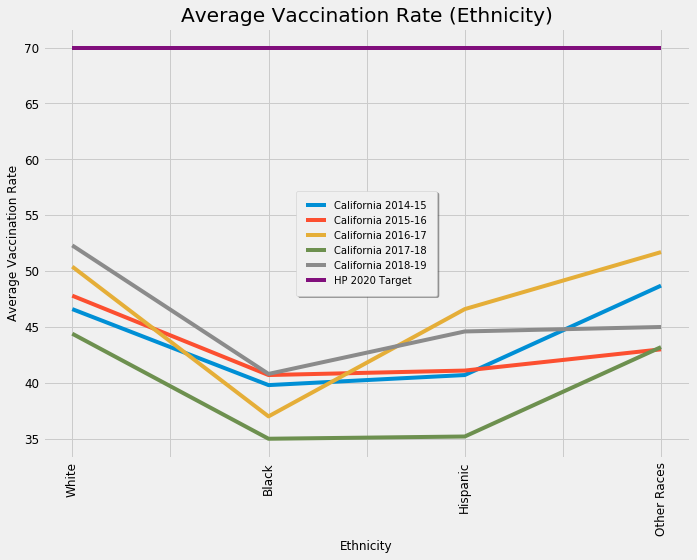

In [23]:

# plot data 
fig2,ax2 = plt.subplots()
plt.style.use('fivethirtyeight')
years_df_eth.plot(kind='line', title ="Average Vaccination Rate (Ethnicity)", figsize=(10, 8), legend=True, fontsize=12, ax=ax2)
ax2.set_xlabel(xlabel="Ethnicity", fontsize=12)
labels = ['White',' ','Black', ' ', 'Hispanic', ' ', 'Other Races']
ax2.set_xticklabels(labels,rotation="vertical")
ax2.set_ylabel("Average Vaccination Rate", fontsize=12)
plt.tight_layout()
plt.axis('tight')
ax2.legend(loc="best", fancybox=True, borderpad=1, prop={'size':10}, shadow=True)
plt.show()

In [76]:
#Save the plot image 
path_eth = os.path.join(os.path.expanduser("~"), "Desktop", "avg_vacc_rate_eth.png")
path_eth
fig2.savefig(path_eth)

In [24]:
years_df_ethbar = df_final_eth_t.loc[:,["California 2014-15","California 2015-16", "California 2016-17", "California 2017-18", "California 2018-19" ]]
years_df_ethbar

Names,California 2014-15,California 2015-16,California 2016-17,California 2017-18,California 2018-19
White,46.6,47.8,50.4,44.4,52.3
Black,39.8,40.7,37.0,35.0,40.8
Hispanic,40.7,41.1,46.6,35.2,44.6
Other Races,48.7,43.0,51.7,43.2,45.0


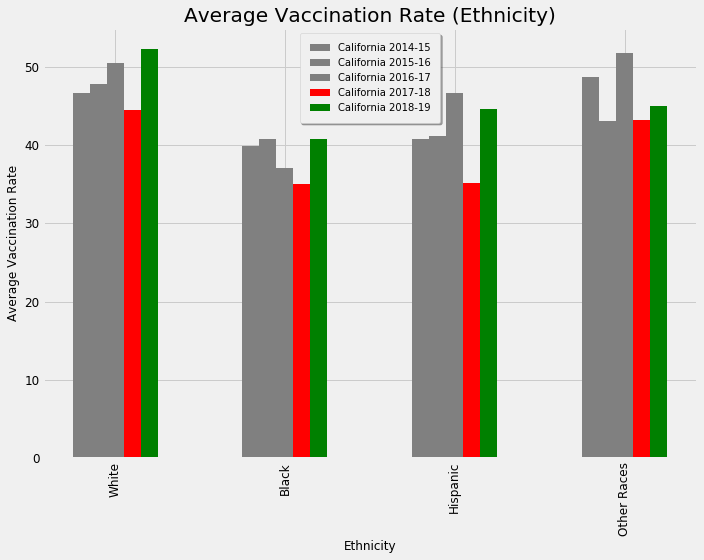

In [25]:

# plot data 
fig4,ax4 = plt.subplots()
plt.style.use('fivethirtyeight')

#colors of bars
my_colors = ['gray','gray', 'gray', 'red', 'green']

years_df_ethbar.plot(kind='bar', title ="Average Vaccination Rate (Ethnicity)", figsize=(10, 8), legend=True, fontsize=12,color=my_colors, ax=ax4)
ax4.set_xlabel(xlabel="Ethnicity", fontsize=12)
labels = ['White','Black', 'Hispanic', 'Other Races']
ax4.set_xticklabels(labels,rotation="vertical")
ax4.set_ylabel("Average Vaccination Rate", fontsize=12)
plt.tight_layout()
plt.axis('tight')
ax4.legend(loc="best", fancybox=True, borderpad=1, prop={'size':10}, shadow=True)
plt.show()

In [27]:
#Save the plot image 
path_eth_bar = os.path.join(os.path.expanduser("~"), "Desktop", "avg_vacc_rate_eth_bar.png")
path_eth_bar
fig4.savefig(path_eth_bar)